In [6]:
# Start your coding from below
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# For lasso
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Run OLS
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [7]:
#1. Getting the number of rental days.

df=pd.read_csv("C:/Users/Leonardo Barrera/OneDrive/Projects Data Science/dataset.json/rental_info.csv")

df["rental_date"]=pd.to_datetime(df["rental_date"])
df["return_date"]=pd.to_datetime(df["return_date"])

df["rental_lenght_days"]=df["return_date"]-df["rental_date"]
df["rental_lenght_days"]=df["rental_lenght_days"].dt.days

df["special_features"].value_counts()

special_features
{Trailers,Commentaries,"Behind the Scenes"}                     1308
{Trailers}                                                      1139
{Trailers,Commentaries}                                         1129
{Trailers,"Behind the Scenes"}                                  1122
{"Behind the Scenes"}                                           1108
{Commentaries,"Deleted Scenes","Behind the Scenes"}             1101
{Commentaries}                                                  1089
{Commentaries,"Behind the Scenes"}                              1078
{Trailers,"Deleted Scenes"}                                     1047
{"Deleted Scenes","Behind the Scenes"}                          1035
{"Deleted Scenes"}                                              1023
{Commentaries,"Deleted Scenes"}                                 1011
{Trailers,Commentaries,"Deleted Scenes","Behind the Scenes"}     983
{Trailers,Commentaries,"Deleted Scenes"}                         916
{Trailers,"Delete

In [30]:

#2. Adding dummy variables using the special features column.

df["deleted_scenes"]=np.where(df["special_features"].str.contains("Deleted Scenes"),1,0)
df["behind_the_scenes"]=np.where(df["special_features"].str.contains("Behind the Scenes"),1,0)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15861 entries, 0 to 15860
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   rental_date         15861 non-null  datetime64[ns, UTC]
 1   return_date         15861 non-null  datetime64[ns, UTC]
 2   amount              15861 non-null  float64            
 3   release_year        15861 non-null  float64            
 4   rental_rate         15861 non-null  float64            
 5   length              15861 non-null  float64            
 6   replacement_cost    15861 non-null  float64            
 7   special_features    15861 non-null  object             
 8   NC-17               15861 non-null  int64              
 9   PG                  15861 non-null  int64              
 10  PG-13               15861 non-null  int64              
 11  R                   15861 non-null  int64              
 12  amount_2            15861 non-nu

In [31]:

#3. Executing a train-test split

cols_to_drop=["special_features", "rental_lenght_days", "rental_date", "return_date"]
X=df.drop(cols_to_drop, axis=1)
y=df["rental_lenght_days"]

#Splitting Data
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=9)


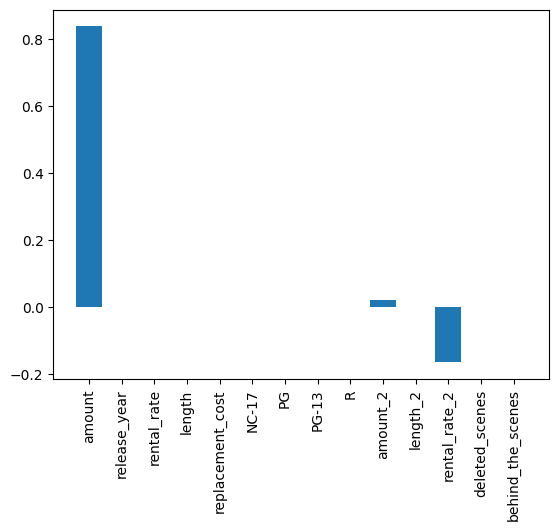

In [32]:
# 4. Performing feature selection
#Instantiating the model
lasso=Lasso(alpha=0.2, random_state=9)
lasso.fit(X_train, y_train)

coef_names=X.columns
coef_values=lasso.coef_

#Filtering not important coefficients
X_lasso_train, X_lasso_test=X_train.iloc[:,coef_values>0], X_test.iloc[:,coef_values>0]

#Plotting coefficient names and coefficient values

plt.bar(coef_names, coef_values)
plt.xticks(rotation=90)
plt.show()

In [33]:
#5. Choosing models and performing hyperparameter tuning

# Creating the LinearRegression based on the Lasso regression coefficients
linearR=LinearRegression()
linearR.fit(X_lasso_train,y_train)


#Creating the RandomForestRegression with Hyperparameter tunning

RandomForest=RandomForestRegressor()
params_grid={"n_estimators": np.arange(1,101,1), "max_depth":np.arange(1,11,1), "max_features":np.arange(1,15,1)}
hypersearch=RandomizedSearchCV(estimator=RandomForest,param_distributions=params_grid, cv=5 , random_state=9)

hypersearch.fit(X_train, y_train)



RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'n_estimators': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])},
                   random_state=9)

In [34]:
#6. Predicting values on test set

#Predicting Linear Model
y_pred_linear=linearR.predict(X_lasso_test)


#Predicting Random Forest Model
y_pred_hyper_randomf=hypersearch.predict(X_test)

In [35]:
#7. Computing mean squared error

#Computing MSE on Linear Regression
mse_linear_lasso=mean_squared_error(y_test, y_pred_linear)

print(mse_linear_lasso)


#Computing MSE on Random Forest
mse_random_forest=mean_squared_error(y_test, y_pred_hyper_randomf)

print(mse_random_forest)

best_model=hypersearch
best_mse=mse_random_forest

4.812297241276236
2.217724504986161
